<a href="https://colab.research.google.com/github/LiamB333/GWO-LSTM/blob/main/KNN_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from pylab import rcParams
import seaborn as sns
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
!pip install pandas-ta
import pandas_ta as ta

In [ ]:
register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

seedrandom = 1

from numpy.random import seed
seed(seedrandom)
tf.random.set_seed(seedrandom)

In [ ]:
dep_var = "Close"
ticker = "KO"

start_date = '2015-06-21'
drop_columns = ["Adj Close","Close"]

### Get TCK history (request)

In [ ]:
# Fetch data by sending a request
tck = yf.Ticker(ticker)

# Start and End Date
tck_hist = yf.download(ticker,'2015-06-21','2021-09-01',interval="1d")

# Save dependent variable data in csv file
tck_hist.to_csv(ticker+".csv")

print(tck_hist.tail())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2021-08-25  56.060001  56.169998  55.730000  56.070000  51.581978  11270700
2021-08-26  55.950001  55.980000  55.509998  55.540001  51.094398  10331500
2021-08-27  55.660000  55.790001  55.450001  55.650002  51.195595   8844100
2021-08-30  55.689999  56.200001  55.639999  56.180000  51.683178  10034700
2021-08-31  56.160000  56.520000  56.000000  56.310001  51.802765  14185700


### Get TCK history (from saved csv file)

In [ ]:
# Get data from saved file
tck_hist = pd.read_csv(ticker+'.csv', header=0) # header is frist row
tck_hist['Date'] = pd.to_datetime(tck_hist['Date'])
tck_hist = tck_hist.set_index('Date')

In [ ]:
tck_adj_close_hist = tck_hist[dep_var]

In [ ]:
tck_adj_close_hist.tail()
print(tck_adj_close_hist.index)

DatetimeIndex(['2015-06-22', '2015-06-23', '2015-06-24', '2015-06-25',
               '2015-06-26', '2015-06-29', '2015-06-30', '2015-07-01',
               '2015-07-02', '2015-07-06',
               ...
               '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-23',
               '2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27',
               '2021-08-30', '2021-08-31'],
              dtype='datetime64[ns]', name='Date', length=1561, freq=None)


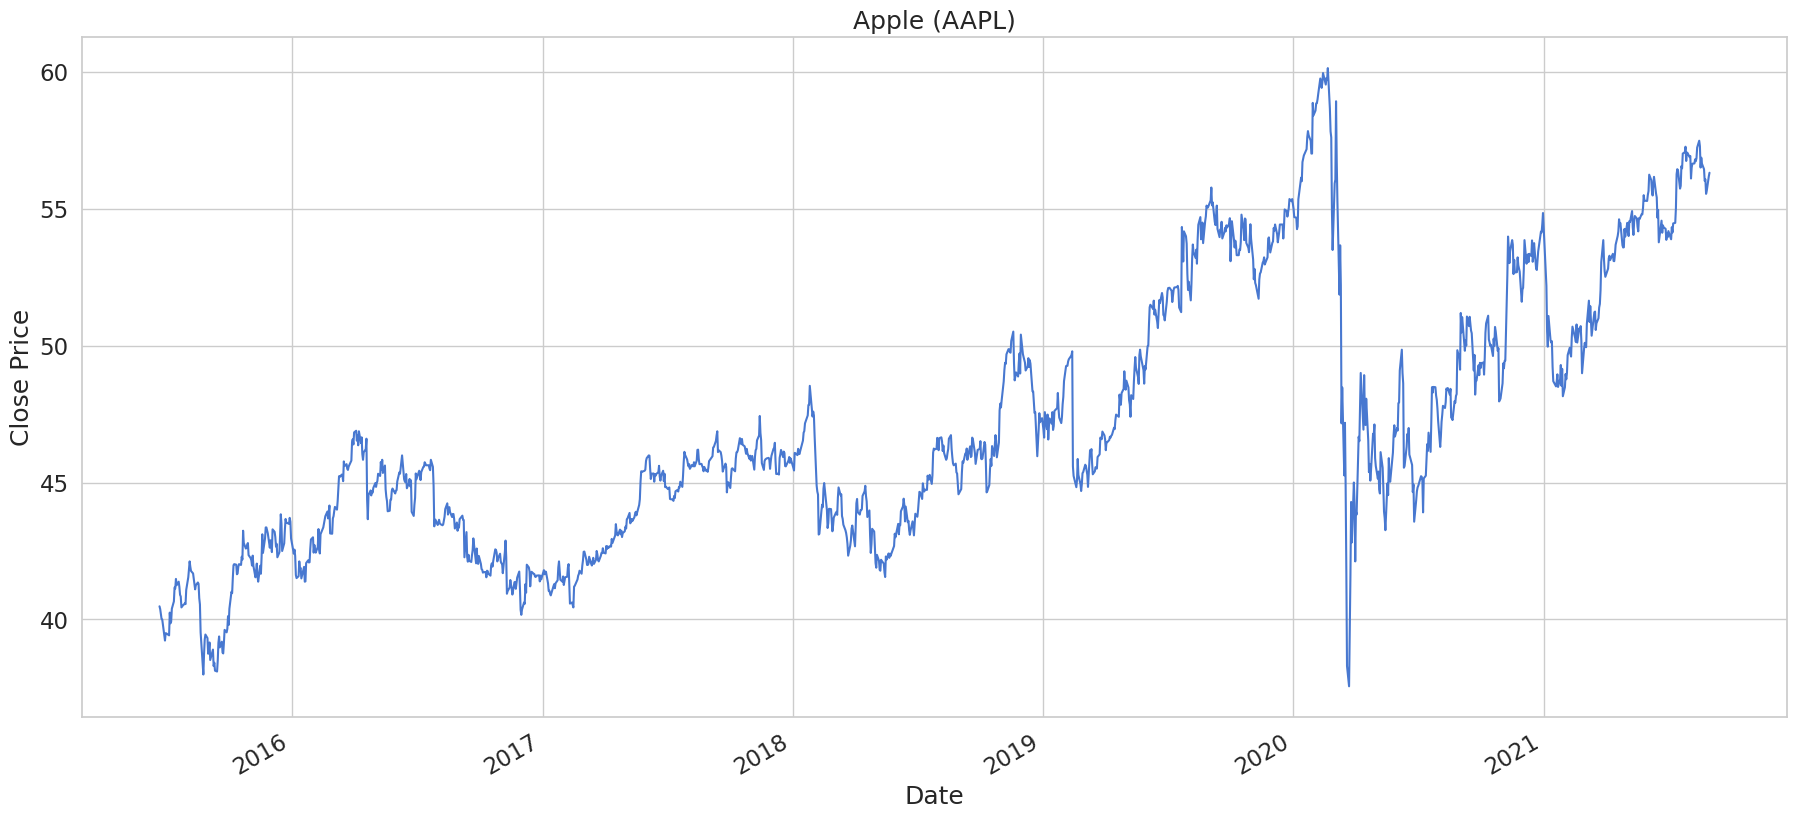

In [ ]:
tck_adj_close_hist.plot()

# Add a title to the plot
plt.title('Apple (AAPL)')

# Adding a label on the left for the price
plt.ylabel('Close Price')

# Show the plot
plt.show()

In [ ]:
df = pd.DataFrame(tck_hist)
print(df)

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-06-22  40.509998  40.810001  40.459999  40.480000  30.613333   8775900
2015-06-23  40.430000  40.520000  40.310001  40.380001  30.537712  11094900
2015-06-24  40.369999  40.450001  40.189999  40.189999  30.394018  10385100
2015-06-25  40.279999  40.340000  40.020000  40.020000  30.265463  10607600
2015-06-26  40.099998  40.349998  40.000000  40.000000  30.250336  16215600
...               ...        ...        ...        ...        ...       ...
2021-08-25  56.060001  56.169998  55.730000  56.070000  51.581978  11270700
2021-08-26  55.950001  55.980000  55.509998  55.540001  51.094398  10331500
2021-08-27  55.660000  55.790001  55.450001  55.650002  51.195595   8844100
2021-08-30  55.689999  56.200001  55.639999  56.180000  51.683178  10034700
2021-08-31  56.160000  56.520000  56.000000  56.310001  51.802765  14185700

[1561 rows 

#### Truncate to dates when tck is in existance

In [ ]:
df = df.loc[start_date:]

df.dropna(inplace=True)

print(df)

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-06-22  40.509998  40.810001  40.459999  40.480000  30.613333   8775900
2015-06-23  40.430000  40.520000  40.310001  40.380001  30.537712  11094900
2015-06-24  40.369999  40.450001  40.189999  40.189999  30.394018  10385100
2015-06-25  40.279999  40.340000  40.020000  40.020000  30.265463  10607600
2015-06-26  40.099998  40.349998  40.000000  40.000000  30.250336  16215600
...               ...        ...        ...        ...        ...       ...
2021-08-25  56.060001  56.169998  55.730000  56.070000  51.581978  11270700
2021-08-26  55.950001  55.980000  55.509998  55.540001  51.094398  10331500
2021-08-27  55.660000  55.790001  55.450001  55.650002  51.195595   8844100
2021-08-30  55.689999  56.200001  55.639999  56.180000  51.683178  10034700
2021-08-31  56.160000  56.520000  56.000000  56.310001  51.802765  14185700

[1561 rows 

#### Adding Indicators

In [ ]:
data = df
# Moving Average Convergence Divergence: macd
data.ta.macd(close=data['Close'], append=True)
# Relative Strength Index: rsi
data.ta.rsi(close=data['Close'], append=True)
# Momentum: mom
data.ta.mom(close=data['Close'], append=True)
# Bollinger Bands: BB
data.ta.bbands(close=data['Close'], append=True)
# Relative Volatility Index: rvi
data.ta.rvi(close=data['Close'], append=True)
# Exponential Moving Average: ema
data.ta.ema(close=data['Close'], append=True)
# Simple Moving Average: sma
data.ta.sma(close=data['Close'], append=True)
# Stochastic : stoch
data.ta.stoch(close=data['Close'], append=True)
# True strength index: tsi
data.ta.tsi(close=data['Close'], append=True)
# Weighted Moving Average: wma
data.ta.wma(close=data['Close'], append=True)
# Triple Exponential Moving Average: tema
data.ta.tema(close=data['Close'], append=True)
# Commodity Channel Index: cci
data.ta.cci(close=data['Close'], append=True)
# Ease of movement : eom
data.ta.eom(close=data['Close'], append=True)
# Chaikin Money Flow : cmf
data.ta.cmf(close=data['Close'], append=True)
# Rate of Change : roc
data.ta.roc(close=data['Close'], append=True)

df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [ ]:
df = data

print("Shape BEFORE: ",df.shape)

df = df.iloc[52:]

df.to_csv("test.csv")

print("Shape AFTER: ",df.shape)

df.to_csv('data.csv', index=False)

Shape BEFORE:  (1561, 29)
Shape AFTER:  (1509, 29)


In [ ]:
features = df.columns

## Modelling

#### Train test split

In [ ]:
# 90% training and 10% test
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size

# Make a copy to ensure the original dataset remains unchanged when scaling
df_copy = df.copy()
train, test = df_copy.iloc[0:train_size], df_copy.iloc[train_size:len(df)]
print(len(train), len(test))

1358 151


#### Scaling

In [ ]:
# Scale all data
tck_transformer = MinMaxScaler()
train[dep_var] = tck_transformer.fit_transform(train[dep_var].values.reshape(-1,1))
test[dep_var] = tck_transformer.transform(test[dep_var].values.reshape(-1,1))

feature_transformer = MinMaxScaler()
train[features] = feature_transformer.fit_transform(train[features].values)
test[features] = feature_transformer.transform(test[features].values)

print(train[features].shape)
print(test[features].shape)

train[features].to_csv("X_train.csv")
train[dep_var].to_csv("y_train.csv")
test[features].to_csv("X_test.csv")
test[dep_var].to_csv("y_test.csv")

#### K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load scaled training and testing sets from CSV files
X_train = pd.read_csv("X_train.csv", index_col=0)
y_train = pd.read_csv("y_train.csv", index_col=0)
X_test = pd.read_csv("X_test.csv", index_col=0)
y_test = pd.read_csv("y_test.csv", index_col=0)

# Instantiate the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.0014711070135801697
Mean Absolute Error (MAE): 0.030748784518342055
Root Mean Squared Error (RMSE): 0.038355012887237694


#### Actual vs predicted values

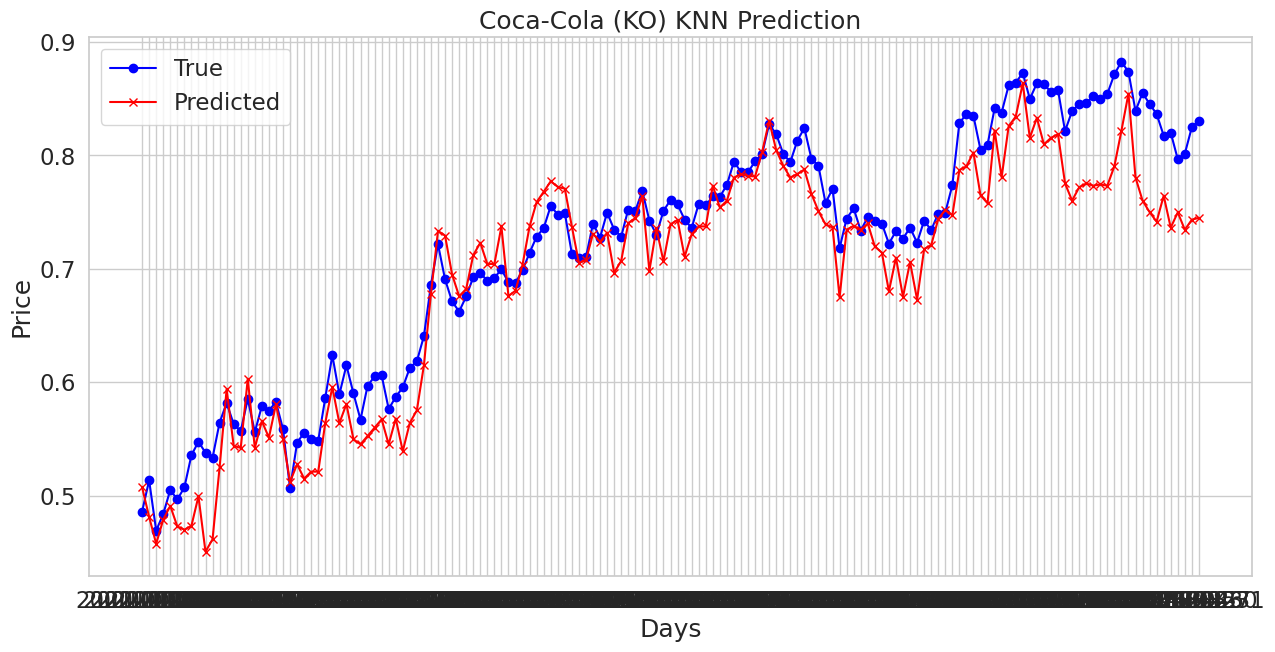

In [ ]:
# Plot real values against prediction
plt.figure(figsize=(15, 7))
plt.plot(y_test.index, y_test.values, label='True', color='blue', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', marker='x')
plt.title('Coca-Cola (KO) KNN Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

#### Support Vector Regression

In [ ]:
from sklearn.svm import SVR

# Instantiate the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.01)

# Train the SVR model
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svr_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.00016658823966183702
Mean Absolute Error (MAE): 0.00969364005358039
Root Mean Squared Error (RMSE): 0.012906906665109073


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Actual vs predicted values

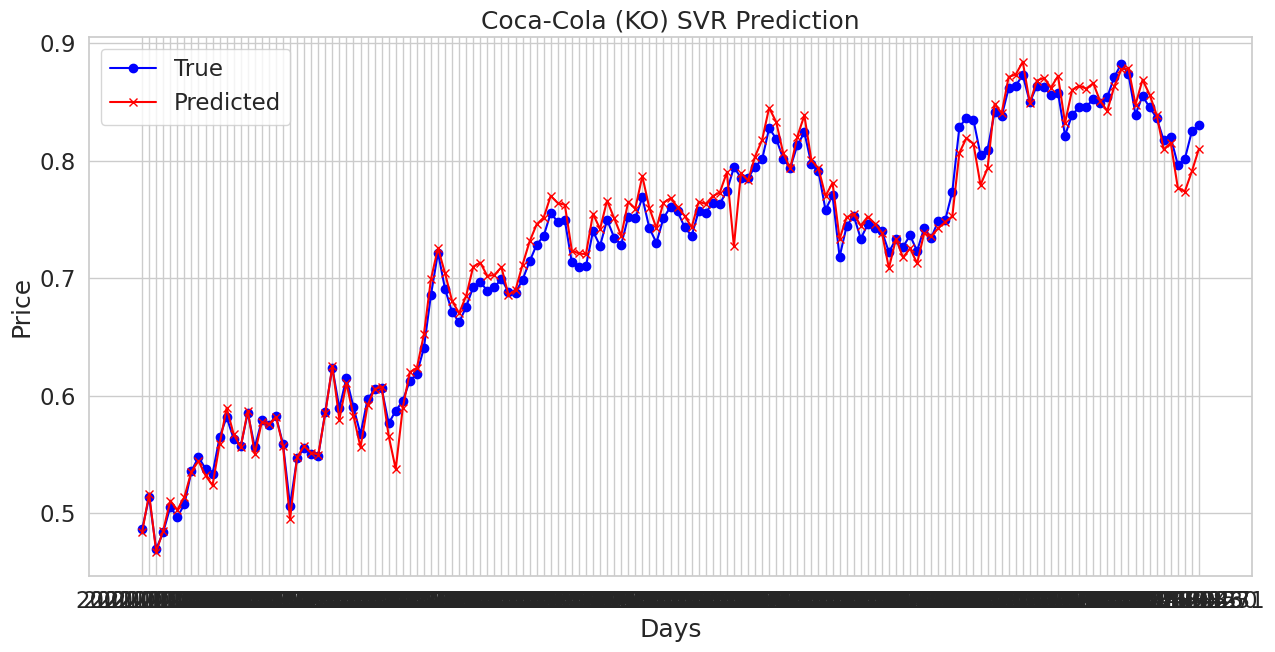

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(y_test.index, y_test.values, label='True', color='blue', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', marker='x')
plt.title('Coca-Cola (KO) SVR Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()